In [ ]:
pip install pandas

In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn


In [ ]:
pip install sklearn


In [4]:
import pandas as pd


In [ ]:
!pip install scikit-learn



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [5]:

try:
    # Load Iris dataset from sklearn
    iris = load_iris(as_frame=True)
    df = iris.frame

    print(" Dataset loaded successfully!\n")
except FileNotFoundError:
    print(" Error: Dataset not found. Please check the file path.")
except Exception as e:
    print(f" An unexpected error occurred: {e}")


 Dataset loaded successfully!



In [6]:
# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head(), "\n")


First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   



In [7]:
# Check dataset info
print("Dataset Info:")
print(df.info(), "\n")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None 



In [8]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum(), "\n")


Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 



In [9]:
# Clean dataset (Iris has no missing values, but we’ll add handling)
df = df.dropna()
print("Dataset cleaned. Any missing values dropped.\n")

Dataset cleaned. Any missing values dropped.



In [10]:

# Task 2: Basic Data Analysis

# Basic statistics
print("Basic Statistics:")
print(df.describe(), "\n")


Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000   



In [11]:
# Grouping: average petal length per species
grouped = df.groupby("target")["petal length (cm)"].mean()
print("Average Petal Length per Species:")
print(grouped, "\n")


Average Petal Length per Species:
target
0    1.462
1    4.260
2    5.552
Name: petal length (cm), dtype: float64 



In [12]:
# Replace target numbers with species names for clarity
df["species"] = df["target"].map({i: name for i, name in enumerate(iris.target_names)})

In [13]:
# Task 3: Data Visualization

sns.set(style="whitegrid")  # for better style


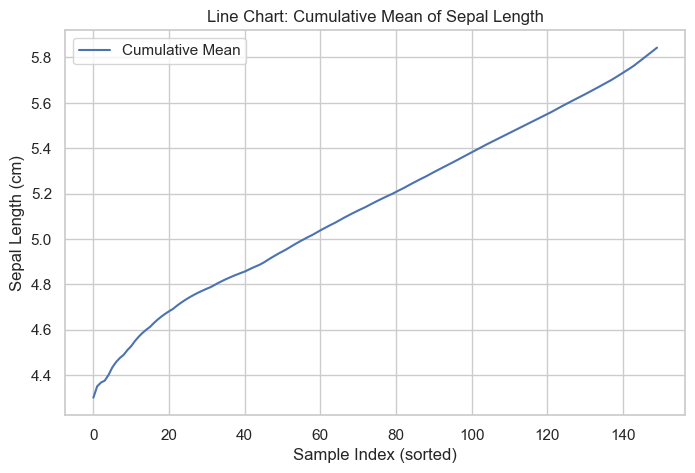

In [14]:
# 1. Line chart – show cumulative mean of sepal length as a trend
df_sorted = df.sort_values("sepal length (cm)")
plt.figure(figsize=(8,5))
plt.plot(df_sorted["sepal length (cm)"].reset_index(drop=True).expanding().mean(), label="Cumulative Mean")
plt.title("Line Chart: Cumulative Mean of Sepal Length")
plt.xlabel("Sample Index (sorted)")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()


C:\Users\JMuli\AppData\Local\Temp\ipykernel_1964\188282688.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="species", y="petal length (cm)", data=df, ci=None)


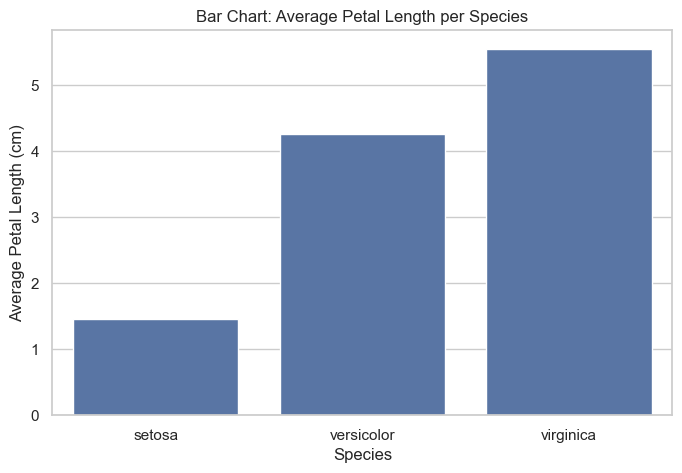

In [15]:
# 2. Bar chart – average petal length per species
plt.figure(figsize=(8,5))
sns.barplot(x="species", y="petal length (cm)", data=df, ci=None)
plt.title("Bar Chart: Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()


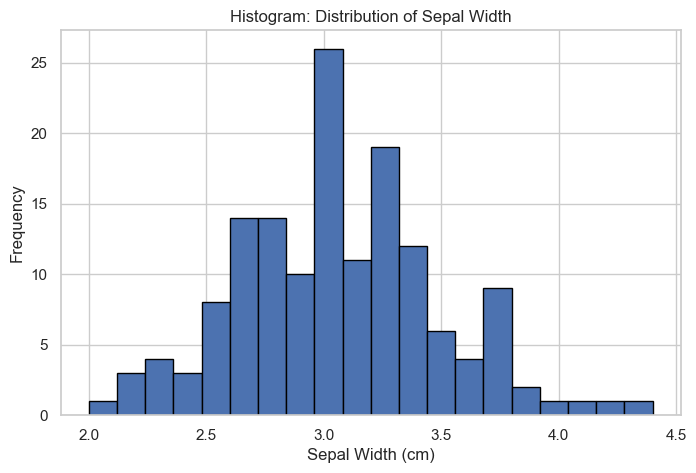

In [16]:
# 3. Histogram – distribution of sepal width
plt.figure(figsize=(8,5))
plt.hist(df["sepal width (cm)"], bins=20, edgecolor="black")
plt.title("Histogram: Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


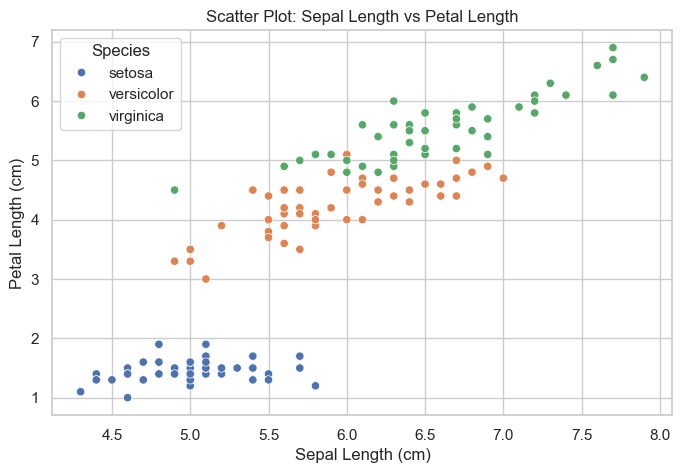

In [17]:
# 4. Scatter plot – sepal length vs petal length
plt.figure(figsize=(8,5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df)
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()


In [18]:
# Findings / Observations

print(" Observations:")
print("- The dataset has no missing values.")
print("- Average petal length varies significantly by species (Setosa < Versicolor < Virginica).")
print("- Sepal width is normally distributed, slightly skewed left.")
print("- Strong positive correlation observed between sepal length and petal length.")


 Observations:
- The dataset has no missing values.
- Average petal length varies significantly by species (Setosa < Versicolor < Virginica).
- Sepal width is normally distributed, slightly skewed left.
- Strong positive correlation observed between sepal length and petal length.
